In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
import pickle

def mean_seq(seq,k=100*64):
    result = []
    length = len(seq)//k
    for i in range(length-1):
        result.append(1.0*sum(seq[i*k:(i+1)*k])/k)
    return result

In [ ]:
input ="/hpcfs/juno/junogpu/fuys/game/hw_game2/hw_text_classification/model/data_enhance/random_del_add_n_aug-1_train_info.pkl"
k =100*64
step =20000
file = open(input,"rb")
data = pickle.load(file)

[1 2]
[1.59131748 1.59460625]
[0.8023872  0.80830889]
[0.80967953 0.81543492]
[0.80598143 0.81245181]


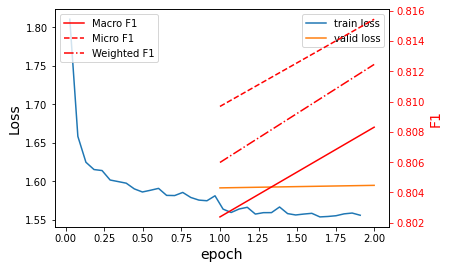

In [ ]:
print(np.array(data["valid_epoch"]))
print(np.array(data["valid_loss"]))
print(np.array(data["valid_macro_f1"]))
print(np.array(data["valid_micro_f1"]))
print(np.array(data["valid_weighted_f1"]))

# draw the loss and lr
loss_fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mean_seq(data["train_epoch"],k),mean_seq(data["train_loss"],k),label="train loss")
ax1.plot(data["valid_epoch"],data["valid_loss"],label="valid loss")
ax1.legend()
ax1.set_xlabel('epoch',fontsize=14)
ax1.set_ylabel('Loss',fontsize=14)
#ax1.tick_params(colors="blue")
ax2.plot(data["valid_epoch"],data["valid_macro_f1"],'r',label="Macro F1")
ax2.plot(data["valid_epoch"],data["valid_micro_f1"],'r--',label="Micro F1")
ax2.plot(data["valid_epoch"],data["valid_weighted_f1"],'r-.',label="Weighted F1")
ax2.set_ylabel('F1', color='red',fontsize=14)
ax2.legend()
#ax2.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax2.tick_params(colors="red")
plt.savefig("train_info.pdf")
